In [20]:
import matplotlib.pyplot as plt
from torch import nn
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import torch

# 不做变动
- 周期起始值与周期结束值之间的距离很大，但实际在周期上很接近（如0时和23时很接近，但根据距离度量却很远）
- 非常不适合深度学习，基于树的机器学习可以尝试

# 独热编码  
- 不能很好地表达数据之间的相邻关系
- 周期太多，导致特征过于稀疏
- 适用于基于树的机器学习模型

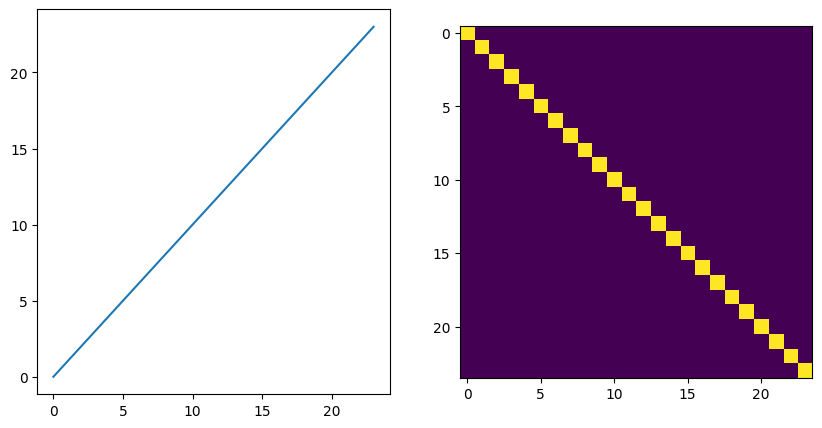

In [13]:
x = np.arange(24)[:, np.newaxis]
enc = OneHotEncoder()
enc.fit(x)
x_onehot = enc.transform(x).toarray()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(x)
axes[1].imshow(x_onehot)

# 正余弦编码
- 用正余弦编码一个标量，可以有效通过向量点积计算向量相似度
- 适用于任何建模方式

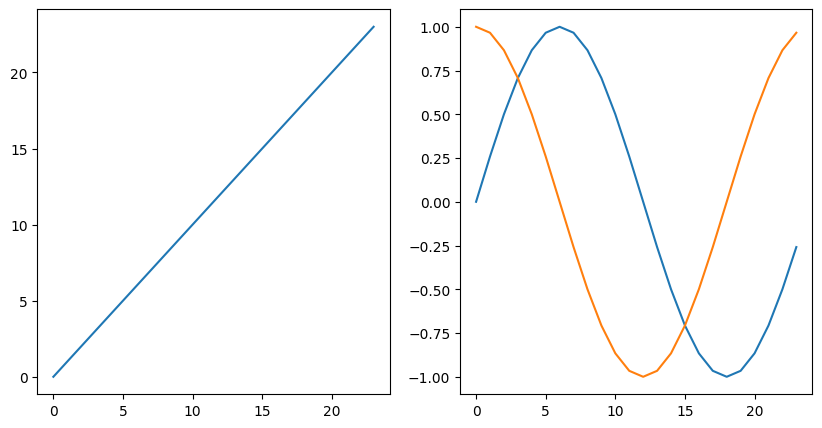

In [16]:
# 以时间为例
x = np.arange(24)
x_sin = np.sin(2 * np.pi * x / 24)
x_cos = np.cos(2 * np.pi * x / 24)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(x)
axes[1].plot(x_sin)
axes[1].plot(x_cos)

# 嵌入式编码
- 基于梯度学习的嵌入式编码
- 适用于深度学习模型，需要大量数据学习支持

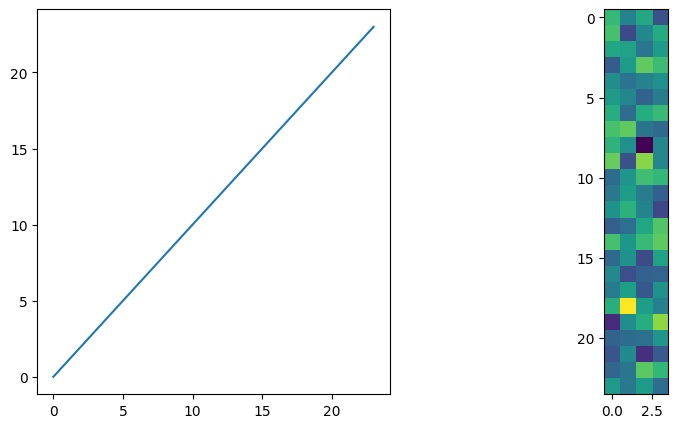

In [25]:
embedding = nn.Embedding(24, int(24 ** 0.5))
x = torch.arange(24)
x_embedding = embedding(x)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(x)
axes[1].imshow(x_embedding.detach().numpy())